In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def plot(OFF, bin_centers,hist, bins, m=False, func=False, title=''):
    idx = OFF > 0
    fig = plt.figure(figsize=(15, 6))
    fig.tight_layout()
    plt.errorbar(bin_centers, hist,np.sqrt(hist+1), alpha=0.5, label='Data', fmt='ko', color='blue')
    plt.hist(OFF[idx],bins,histtype='bar',color='lightblue',density=False,alpha=0.5)
    plt.xlabel('[A.U.]')
    plt.ylabel('Counts')
    plt.title(title)
    plt.grid(True)

    if m and func:
        plt.errorbar(bin_centers, func(bin_centers,*m.values),np.sqrt(func(bin_centers,*m.values)), fmt='ko',color='black',linestyle='-', label='MIGRAD',alpha=0.8)

        title = []
        for par in m.parameters:
            title.append(
                f"{par} = {m.values[par]:.5f} +/- {m.errors[par]:.5f}"
            )
        title.append(r'$\chi^{2}_{0} = $'+f"{m.fval/m.ndof:.2f}")

        # Create the legend
        legend = plt.legend(title="\n".join(title),fontsize=10)

        # Adjust the title's font size
        legend.get_title().set_fontsize(10)  # or use a numeric value like 8

In [35]:
OFF = np.genfromtxt('/home/drtofa/OneDrive/QTLab2324/DATA ANALYSIS/OPTIMUM/TXT/maxs.txt')

In [36]:
bins = 20  # Number of bins
hist, bin_edges = np.histogram(OFF, bins=bins, density=False)
# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

/tmp/ipykernel_5663/2832061085.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(bin_centers, hist,np.sqrt(hist+1), alpha=0.5, label='Data', fmt='ko', color='blue')


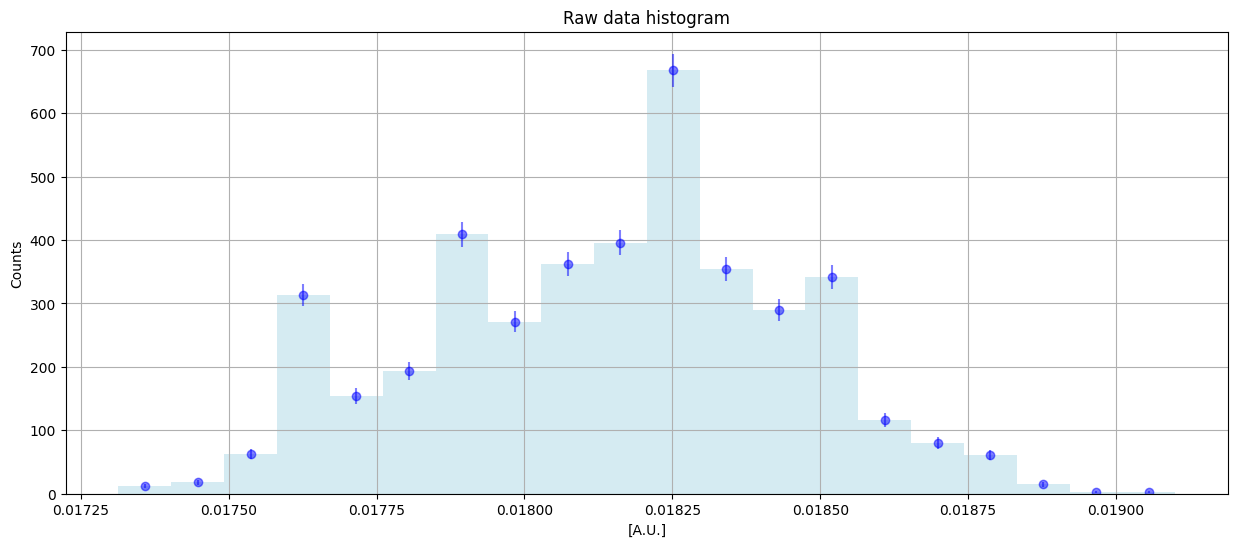

In [37]:
plot(OFF,bin_centers,hist,bins,title='Raw data histogram')